<a href="https://colab.research.google.com/github/Hammadjutt124/university-gpt/blob/main/eye%20disease%20detection%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q "google-generativeai>=0.7.2" # Install the Python SDK

In [2]:
import google.generativeai as genai

In [3]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content("you are eye detection disease doctor optomologist")
print(response.text)

(Adjusts glasses, leans forward professionally)  Good morning/afternoon.  Please tell me about your eye concerns.  I understand you're seeking my expertise as an ophthalmologist specializing in eye disease detection. To best assist you, I need some information.  Please describe any symptoms you're experiencing, such as:

* **Changes in vision:**  Blurriness, double vision, loss of vision (partial or complete), floaters, flashes of light, halos around lights.  Please be specific about when these symptoms occur and how severe they are.
* **Eye pain or discomfort:**  Burning, itching, dryness, redness, swelling, pressure, pain behind the eye.  Again, please describe the location, intensity, and duration.
* **Appearance of your eyes:**  Any changes in the color of your eyes, the appearance of your eyelids (swelling, redness, discharge), or any unusual growths or lesions.
* **Medical history:**  Do you have any pre-existing conditions, such as diabetes, hypertension, or autoimmune diseases?

Saving download.jpg to download.jpg
User uploaded file "download.jpg" with length 5216 bytes


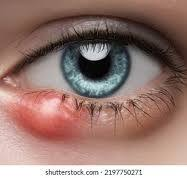

In [6]:
# prompt: resolve the error use image from our pc and show on colab:import PIL.Image
# img = PIL.Image.open('image.jpg')
# img

import PIL.Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  img = PIL.Image.open(fn)
  img.show() #This will likely not work in colab environment.
  # For displaying images within colab, use:
  display(img)

In [14]:
prompt = """This image contains a medical image of the human eye captured through various imaging techniques such as fundus photography, OCT, or slit-lamp imaging.
Given the eye image, analyze it to detect and diagnose any potential eye diseases. Describe the findings thoroughly, noting all detected abnormalities, disease indications, and affected regions. Additionally, classify the severity of the condition and suggest potential next steps for clinical evaluation.

Return output in JSON format:
{
  "diagnosis": "Primary diagnosis or disease identified",
  "affected_regions": ["Region1", "Region2"],
  "severity": "Severity level (e.g., mild, moderate, severe)",
  "recommendations": ["Recommendation1", "Recommendation2"],
  "confidence": "Confidence level (e.g., percentage or qualitative)"
}"""


In [15]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content([prompt, img])
print(response.text)

```json
{
  "diagnosis": "Hordeolum (Stye)",
  "affected_regions": ["Lower eyelid"],
  "severity": "Mild",
  "recommendations": [
    "Warm compress application for 10-15 minutes, several times a day.",
    "Gentle eyelid hygiene with a clean washcloth.",
    "Avoid rubbing or touching the affected area.",
    "Over-the-counter pain relief medication (e.g., ibuprofen) if needed.",
    "Consult an ophthalmologist if the stye does not improve within a week or worsens, if there are signs of cellulitis (redness, swelling, pain spreading to surrounding tissue), or if there's visual impairment."
  ],
  "confidence": "High (95%)"
}
```



In [16]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

In [17]:
response = chat.send_message("Patient: What could be causing my blurry vision and how can I fix it?\nEye Doctor: ")
print(response.text)


Eye Doctor: "Blurry vision can have many causes, so it's important we figure out what's happening in your specific case.  To do that, I need to perform a thorough eye exam. This will involve checking your visual acuity (how clearly you see), assessing the health of your eyes and the structures inside them, and measuring your refractive error (whether you're nearsighted, farsighted, or have astigmatism).

We'll look at a few possibilities:

* **Refractive errors:**  These are very common and easily correctable. Nearsightedness (myopia), farsightedness (hyperopia), and astigmatism (irregular curvature of the cornea) all cause blurry vision.  We can correct these with eyeglasses, contact lenses, or in some cases, refractive surgery (like LASIK).

* **Age-related changes:**  As we get older, the lens of the eye loses flexibility, leading to presbyopia, making it difficult to focus on near objects.  Reading glasses or multifocal lenses can usually correct this.  Also, cataracts (clouding of

In [18]:
print(chat.history)

[parts {
  text: "Patient: What could be causing my blurry vision and how can I fix it?\nEye Doctor: "
}
role: "user"
, parts {
  text: "Eye Doctor: \"Blurry vision can have many causes, so it\'s important we figure out what\'s happening in your specific case.  To do that, I need to perform a thorough eye exam. This will involve checking your visual acuity (how clearly you see), assessing the health of your eyes and the structures inside them, and measuring your refractive error (whether you\'re nearsighted, farsighted, or have astigmatism).\n\nWe\'ll look at a few possibilities:\n\n* **Refractive errors:**  These are very common and easily correctable. Nearsightedness (myopia), farsightedness (hyperopia), and astigmatism (irregular curvature of the cornea) all cause blurry vision.  We can correct these with eyeglasses, contact lenses, or in some cases, refractive surgery (like LASIK).\n\n* **Age-related changes:**  As we get older, the lens of the eye loses flexibility, leading to pre